In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib as mptb
from scipy import stats
import seaborn as sns
import math


In [3]:
URL = 'https://www1.nseindia.com/content/indices/ind_nifty50list.csv'
df = pd.read_csv(URL)
df


,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024
1,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042
2,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024
3,Asian Paints Ltd.,Consumer Durables,ASIANPAINT,EQ,INE021A01026
4,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034
5,Bajaj Auto Ltd.,Automobile and Auto Components,BAJAJ-AUTO,EQ,INE917I01010
6,Bajaj Finance Ltd.,Financial Services,BAJFINANCE,EQ,INE296A01024
7,Bajaj Finserv Ltd.,Financial Services,BAJAJFINSV,EQ,INE918I01026
8,Bharat Petroleum Corporation Ltd.,Oil Gas & Consumable Fuels,BPCL,EQ,INE029A01011
9,Bharti Airtel Ltd.,Telecommunication,BHARTIARTL,EQ,INE397D01024


In [4]:
nifty_50_list = df['Symbol'].tolist()
nifty_50_list

['ADANIENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'HDFC',
 'ICICIBANK',
 'ITC',
 'INDUSINDBK',
 'INFY',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NTPC',
 'NESTLEIND',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SBIN',
 'SUNPHARMA',
 'TCS',
 'TATACONSUM',
 'TATAMOTORS',
 'TATASTEEL',
 'TECHM',
 'TITAN',
 'UPL',
 'ULTRACEMCO',
 'WIPRO']

In [5]:
for i in range (0,len(nifty_50_list)):
    nifty_50_list[i]=nifty_50_list[i]+".NS"

In [6]:
nifty_50_list

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [7]:
start  = "2022-01-31"
end    = "2023-01-29"

In [8]:
no_of_stocks=20
expected_return =0.3
portfolio= nifty_50_list[9:14]
no_of_simulations= 10**6
risk_free_rate=0.00018538

In [9]:
df_list=[]
for i in portfolio:
    df_list.append(yf.download(i,start,end))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
df_list[1]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31,3510.000000,3636.000000,3510.000000,3535.300049,3421.742188,462842
2022-02-01,3560.000000,3710.000000,3545.050049,3656.600098,3539.146240,631482
2022-02-02,3670.000000,3670.000000,3604.800049,3621.050049,3504.738037,209928
2022-02-03,3622.000000,3652.000000,3555.000000,3562.399902,3447.971680,203975
2022-02-04,3583.449951,3593.699951,3540.000000,3562.000000,3447.584717,162672
...,...,...,...,...,...,...
2023-01-20,4362.000000,4362.000000,4312.850098,4318.950195,4318.950195,154486
2023-01-23,4330.000000,4357.450195,4319.149902,4337.850098,4337.850098,119143
2023-01-24,4350.799805,4408.950195,4323.200195,4396.049805,4396.049805,135586


In [11]:
pct_change_list=[]
for i in df_list:
    pct_change_list.append(i["Adj Close"].pct_change())

In [12]:
pct_change_list

[Date
 2022-01-31         NaN
 2022-02-01   -0.008570
 2022-02-02    0.002766
 2022-02-03   -0.004689
 2022-02-04   -0.002009
                 ...   
 2023-01-20   -0.009780
 2023-01-23    0.010792
 2023-01-24    0.003818
 2023-01-25    0.001096
 2023-01-27   -0.002576
 Name: Adj Close, Length: 248, dtype: float64,
 Date
 2022-01-31         NaN
 2022-02-01    0.034311
 2022-02-02   -0.009722
 2022-02-03   -0.016197
 2022-02-04   -0.000112
                 ...   
 2023-01-20   -0.012224
 2023-01-23    0.004376
 2023-01-24    0.013417
 2023-01-25   -0.001797
 2023-01-27   -0.001766
 Name: Adj Close, Length: 248, dtype: float64,
 Date
 2022-01-31         NaN
 2022-02-01    0.001482
 2022-02-02    0.005706
 2022-02-03    0.000998
 2022-02-04   -0.006980
                 ...   
 2023-01-20   -0.010706
 2023-01-23    0.008638
 2023-01-24   -0.000376
 2023-01-25   -0.025326
 2023-01-27    0.011591
 Name: Adj Close, Length: 248, dtype: float64,
 Date
 2022-01-31         NaN
 2022-02-01    0.02

In [13]:
for i in range (0,len(pct_change_list)):
    pct_change_list[i]=pct_change_list[i][1:]

In [14]:
pct_change_list[1]

Date
2022-02-01    0.034311
2022-02-02   -0.009722
2022-02-03   -0.016197
2022-02-04   -0.000112
2022-02-07   -0.031836
                ...   
2023-01-20   -0.012224
2023-01-23    0.004376
2023-01-24    0.013417
2023-01-25   -0.001797
2023-01-27   -0.001766
Name: Adj Close, Length: 247, dtype: float64

In [15]:
def logreturn(aray):  
    for i in range (0,len(aray)):
        aray[i]=math.log(1+aray[i])
    return aray

In [16]:
for i in range (0,len(pct_change_list)):
    pct_change_list[i]=logreturn(pct_change_list[i])

In [17]:
pct_change_list[1]

Date
2022-02-01    0.033736
2022-02-02   -0.009770
2022-02-03   -0.016330
2022-02-04   -0.000112
2022-02-07   -0.032354
                ...   
2023-01-20   -0.012300
2023-01-23    0.004366
2023-01-24    0.013328
2023-01-25   -0.001799
2023-01-27   -0.001768
Name: Adj Close, Length: 247, dtype: float64

In [18]:
mean_list=[]
for i in range(0,len(pct_change_list)):
    uz=pct_change_list[i]
    mean_list.append(uz.mean())

In [19]:
mean_list

[0.0002614066318256374,
 0.0009999602801916954,
 0.00043556432069902435,
 0.0017701815528540492,
 -0.0006784421806250693]

In [20]:
cov_matrix=np.cov(pct_change_list)

In [21]:
cov_matrix

array([[2.16971310e-04, 3.82307358e-05, 6.07766208e-05, 7.15890182e-05,
        5.92004168e-05],
       [3.82307358e-05, 2.22701771e-04, 1.99010320e-05, 1.62242858e-05,
        3.19043554e-06],
       [6.07766208e-05, 1.99010320e-05, 1.97304808e-04, 5.20968635e-05,
        1.03324562e-04],
       [7.15890182e-05, 1.62242858e-05, 5.20968635e-05, 4.48761480e-04,
        3.46927573e-05],
       [5.92004168e-05, 3.19043554e-06, 1.03324562e-04, 3.46927573e-05,
        3.51124797e-04]])

In [22]:
from numpy import random
random.seed(42)

In [23]:
random_list=np.random.uniform(0,1,(no_of_simulations,len(portfolio)))

    

In [24]:
random_list

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
       [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497],
       ...,
       [0.07646361, 0.76326117, 0.76164601, 0.0209907 , 0.06587263],
       [0.63358536, 0.95332803, 0.73874752, 0.67446963, 0.72985841],
       [0.67913167, 0.39811463, 0.99616959, 0.62296022, 0.06425899]])

In [25]:
for i in range (0,no_of_simulations) :
    x=sum(random_list[i])
    
    random_list[i]=(random_list[i])/x

In [26]:
random_list

array([[0.13319703, 0.33810082, 0.26031769, 0.21289984, 0.05548463],
       [0.06528492, 0.02430844, 0.36250145, 0.25157131, 0.29633388],
       [0.00928442, 0.43746759, 0.37546445, 0.09577331, 0.08201023],
       ...,
       [0.04529206, 0.45210623, 0.45114952, 0.01243352, 0.03901866],
       [0.16986253, 0.25558468, 0.19805622, 0.18082349, 0.19567307],
       [0.24600559, 0.14421125, 0.36084798, 0.2256583 , 0.02327689]])

In [27]:
sum(random_list[0])

0.9999999999999999

In [28]:
covar_list_3000=[]
for i in range(0,len(random_list)):
    #covar_list.append(np.dot(random_list[i],cov_matrix,np.transpose(random_list[i])))
    covar_list_3000.append(np.matmul(np.matmul(random_list[i],cov_matrix), np.transpose(random_list[i])))

In [29]:
covar_list_3000

[9.222976077489058e-05,
 0.00013132689048389636,
 9.666417609836626e-05,
 0.00010108641025756945,
 0.00011001027342792012,
 0.00011630825065087454,
 0.00014114127548932705,
 0.00011696571618962334,
 0.00015550854225644434,
 0.00010278711170569767,
 9.474962344050722e-05,
 0.00012772249160325014,
 9.906740074542041e-05,
 0.00013075432320382543,
 0.00013237720628219647,
 0.00010184689744447025,
 9.503604063084289e-05,
 0.00010178962178632468,
 9.959516467975717e-05,
 9.173404331040054e-05,
 0.00011359179077726164,
 9.358812873409241e-05,
 0.00012133241013747235,
 0.00010315661332091922,
 9.36120848823552e-05,
 9.394656999587581e-05,
 0.00013202628478192275,
 0.00010626788613982006,
 0.00010276876184262772,
 9.768277168443517e-05,
 0.00012059862000893376,
 9.707515060597592e-05,
 9.505200146402214e-05,
 0.00011198981925398347,
 0.00012237529229702402,
 0.00012498767846676786,
 0.00012925751484889323,
 8.978188017447633e-05,
 9.516875473133114e-05,
 0.00010037016592703961,
 0.0001414019366

In [30]:
len(covar_list_3000)

1000000

In [31]:
mean_list

[0.0002614066318256374,
 0.0009999602801916954,
 0.00043556432069902435,
 0.0017701815528540492,
 -0.0006784421806250693]

In [32]:
meanlist_3000=[]
for i in range(0,no_of_simulations):
    meanlist_3000.append(np.matmul(mean_list,np.transpose(random_list[i])))
    

In [33]:
meanlist_3000

[0.0008255193263770945,
 0.0004435475695255262,
 0.0007173130889892381,
 0.0006613231428292247,
 0.0004104072230373602,
 0.0007699274045758006,
 0.0005012412284793515,
 0.0006299871250724573,
 0.001085963514336143,
 0.0006980531614379133,
 0.0006263279045128591,
 0.0001738712705382695,
 0.0005524837079158491,
 3.714344242767924e-05,
 0.0005470366322475944,
 0.0007565918676352769,
 0.00040812645782122123,
 0.0007675654155136771,
 0.000528511762274234,
 0.000513391509200174,
 0.00044449806280608193,
 0.0006725213950089862,
 0.000582062259463395,
 0.0007064565032147195,
 0.0005449442450087848,
 0.000369852941028459,
 0.0001673371181854955,
 0.0003103222921852653,
 0.0004611304915181204,
 0.0005003955524408547,
 0.0002665642920500021,
 0.0003761745703098455,
 0.0008370760721923198,
 0.0001477278057638344,
 0.00018286738284093964,
 0.001061699365303405,
 0.0007887968229128925,
 0.0007150852027892945,
 0.0007699971919872426,
 0.0006180320278503595,
 0.0006275304904263454,
 0.0003114020017334

In [34]:
sharp_list=[]
for i in range (0,no_of_simulations):
    sharp_list.append((meanlist_3000[i]-risk_free_rate)/covar_list_3000[i])

In [35]:
sharp_list

[6.940702447873763,
 1.965839353800762,
 5.502897872402478,
 4.708280189359931,
 2.045510987524273,
 5.025846415061745,
 2.2379082758341418,
 3.801174733557531,
 5.791215718883266,
 4.987718332876309,
 4.653822236979422,
 -0.09010730465140435,
 3.705595434558923,
 -1.1337029165853527,
 2.7320158991467856,
 5.608534790632356,
 2.343810372808517,
 5.719496794435413,
 3.4452652734453078,
 3.575679184774198,
 2.281133707225181,
 5.205162252929305,
 3.269384157241624,
 5.051314563746442,
 3.841002424640566,
 1.9635942114390894,
 -0.13666128562435279,
 1.1757295333876763,
 2.683213133776816,
 3.2248834365441077,
 0.6731776204735019,
 1.9654316178634934,
 6.8562056785199985,
 -0.33621086708581593,
 -0.020532062574868767,
 7.011246036835574,
 4.668330685595409,
 5.899912117677861,
 6.142953048378776,
 4.310564039167375,
 3.1269054797053215,
 0.8943801037224512,
 1.9412666719096459,
 2.389877666865574,
 4.702494869110551,
 5.545534013408198,
 5.0528854747738805,
 4.817202320314582,
 5.665254675

In [36]:
max_sharp=max(sharp_list)

In [37]:
ind_list=0
while sharp_list[ind_list]<max_sharp:
    ind_list=ind_list+1

In [38]:
 ind_list

308447

In [39]:
optimal_weights=random_list[2790]

In [40]:
optimal_weights

array([0.2230895 , 0.16846108, 0.21707337, 0.17599947, 0.21537658])

In [41]:
optimal_returns=meanlist_3000[ind_list]
optimal_var=covar_list_3000[ind_list]
print(optimal_returns)
print(optimal_var)

0.001055185023130593
0.00010987338229828173


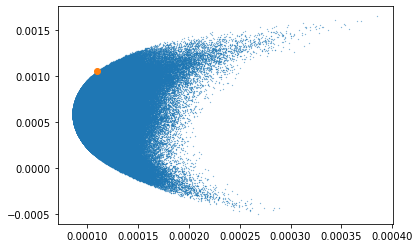

In [46]:
import matplotlib.pyplot as plt
plt.scatter(covar_list_3000 ,meanlist_3000,s=0.05)
plt.scatter(optimal_var,optimal_returns)
plt.show()